# **Credit Card Fraud Detection**

Anonymized credit card transactions labeled as fraudulent or genuine.

[https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [120]:
# Imported Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Load Dataset.
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [122]:
data.info() # Data Summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [123]:
data.describe() # Data Statistics.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [124]:
# Missing Values Count.
data.isnull().sum().max()

0

In [125]:
# The classes are heavily skewed. We need to resolve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100, 2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


*Notice how imbalanced is the original dataset! Most of the transactions are in the Non-Fraud category. If we use this data as the base for our predictive models and analysis, we might get a lot of errors and our implemented ML algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, instead it must accurately detect patterns that give signs of Fraud.*

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

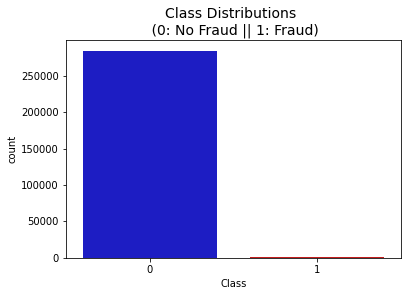

In [126]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data = data, palette = colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize = 14)

***Distributions:*** *By seeing the distributions, we can have an idea of how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.*

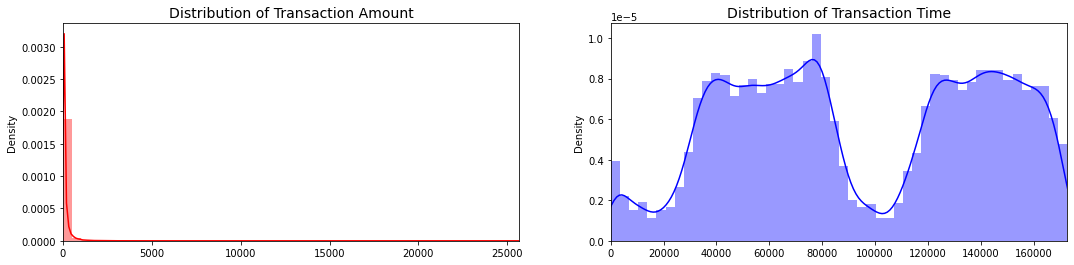

In [127]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax = ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax = ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Feature Scaling.

In [128]:
# "Time" and "Amount" features should be scaled just like the other remaining features.
from sklearn.preprocessing import RobustScaler
rsc = RobustScaler()
data['Amount'] = rsc.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = rsc.fit_transform(data['Time'].values.reshape(-1, 1))

In [129]:
# Split the dataset into independent and dependent features.
X = data.drop('Class', axis = 1)
y = data['Class']

# **Sampling Techniques for Imbalance Data.**

[https://imbalanced-learn.org/stable/index.html#](https://imbalanced-learn.org/stable/index.html#)

[https://imbalanced-learn.org/stable/references/index.html#api](https://imbalanced-learn.org/stable/references/index.html#api)

# **Random Under-Sampling**

***Random Under-Sampling involves randomly selecting examples from the majority class and deleting them from the training dataset. In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached.***

# **Steps:**

1.   The first thing is to determine how **imbalanced** is our class (use "**value_counts()**" on the class column to determine the amount for each label).
2.   After determining how many instances are considered **fraud transactions**, we should bring the **non-fraud transactions** to the same level as **fraud transactions** (assuming we want a 50/50 ratio). This will be equivalent to 492 cases of **fraud** and 492 cases of **non-fraud** transactions.
3.   After implementing this technique, we have a sub-sample of the data frame with a 50/50 ratio for each class. Then the next step is to **shuffle the data** to see if our models can maintain a certain accuracy every time we run this script.

The main issue with **"Random Under-Sampling"** is that our classification models will not perform as accurate as we would like to since there is a **great deal of information loss** (i.e., bringing 492 non-fraud transactions from 284,315 non-fraud transactions).



In [130]:
# Implementing Undersampling for Handling Imbalanced.
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state = 42)
X_undersample, y_undersample = nm.fit_sample(X, y)

In [131]:
X_undersample.shape, y_undersample.shape

((984, 30), (984,))

In [132]:
from collections import Counter
print('Original Label Count {}'.format(Counter(y)))
print('Resampled Label Count {}'.format(Counter(y_undersample)))

Original Label Count Counter({0: 284315, 1: 492})
Resampled Label Count Counter({0: 492, 1: 492})


In [133]:
# Randomly Shuffle data and target variables.
from sklearn.utils import shuffle
X_undersample, y_undersample = shuffle(X_undersample, y_undersample)

# **Over-Sampling Methods**

[https://imbalanced-learn.org/stable/references/index.html#api](https://imbalanced-learn.org/stable/references/index.html#api)

1. **Random Over-Sampling**

2. **SMOTE Algorithms**

# **Random Over-Sampling**

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler)

***Random Over-Sampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. In the random over-sampling, the minority class instances are selected with replacement, until a more balanced distribution is reached.***

In [134]:
# Implementing Oversampling for Handling Imbalanced Dataset.
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio = 0.5, random_state = 42)
X_oversample, y_oversample = os.fit_sample(X, y)

In [135]:
X_oversample.shape, y_oversample.shape

((426472, 30), (426472,))

In [136]:
from collections import Counter
print('Original Label Count {}'.format(Counter(y)))
print('Resampled Label Count {}'.format(Counter(y_oversample)))

Original Label Count Counter({0: 284315, 1: 492})
Resampled Label Count Counter({0: 284315, 1: 142157})


In [137]:
# Randomly Shuffle data and target variables.
from sklearn.utils import shuffle
X_oversample, y_oversample = shuffle(X_oversample, y_oversample)

# **SMOTE Sampling**

[SMOTE algorithms](https://imbalanced-learn.org/stable/references/over_sampling.html#smote-algorithms)

***SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.***

[class imblearn.over_sampling.SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE)

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**
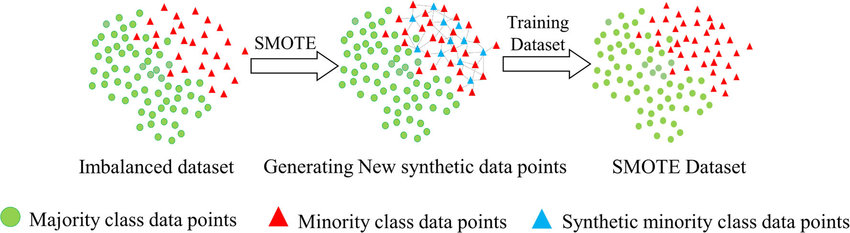

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

***SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random Under-Sampling, SMOTE creates new synthetic points to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".***

**Understanding SMOTE:**
*   **Solving the Class Imbalance:** SMOTE creates synthetic data points from the minority class to reach an equal balance between the minority and majority class.
*   **Location of the Synthetic Points:** SMOTE picks the distance between the closest neighbors of the minority class. In between these distances, it creates synthetic data points.
*   **Final Effect:** More information is retained since we didn't have to delete any rows unlike in random undersampling.
*   **Accuracy || Time Tradeoff:** Although SMOTE will likely be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [138]:
# Implementing SMOTE Sampling for Handling Imbalanced Dataset.
from imblearn.over_sampling import SMOTE 
smote =  SMOTE(ratio = 0.75, random_state = 42)
X_smote, y_smote = smote.fit_sample(X, y)

In [139]:
X_smote.shape, y_smote.shape

((497551, 30), (497551,))

In [140]:
from collections import Counter
print('Original Label Count {}'.format(Counter(y)))
print('Resampled Label Count {}'.format(Counter(y_smote)))

Original Label Count Counter({0: 284315, 1: 492})
Resampled Label Count Counter({0: 284315, 1: 213236})


In [141]:
# Randomly Shuffle data and target variables.
from sklearn.utils import shuffle
X_smote, y_smote = shuffle(X_smote, y_smote)

# **Combination of Over- and Under-Sampling Methods**

The [imblearn.combine](https://imbalanced-learn.org/stable/references/combine.html) provides methods which combine over-sampling and under-sampling.

[class imblearn.combine.SMOTETomek()](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

In [142]:
# Implementing SMOTETomek Sampling for Handling Imbalanced Dataset.
from imblearn.combine import SMOTETomek
tomek = SMOTETomek(ratio = 0.8, random_state = 42)
X_tomek, y_tomek = tomek.fit_sample(X, y)

In [143]:
X_tomek.shape, y_tomek.shape

((511767, 30), (511767,))

In [144]:
from collections import Counter
print('Original Label Count {}'.format(Counter(y)))
print('Resampled Label Count {}'.format(Counter(y_tomek)))

Original Label Count Counter({0: 284315, 1: 492})
Resampled Label Count Counter({0: 284315, 1: 227452})


In [145]:
# Randomly Shuffle data and target variables.
from sklearn.utils import shuffle
X_tomek, y_tomek = shuffle(X_tomek, y_tomek)

# **Overfitting during Cross-Validation:**

It is not advisable to undersample or oversample the dataset before cross-validation. It is because we will be directly influencing the validation set before implementing cross-validation, causing a "data leakage" problem.


**The Wrong Way:**

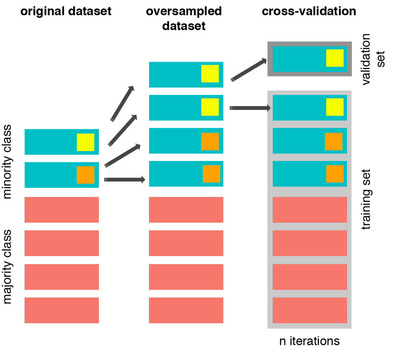

As mentioned previously, if we get the minority class **"Fraud"**, then, in that case, creating the synthetic points before cross-validating will have a certain influence on the "validation set" in the cross-validation process. Recall how cross-validation works: let's assume we are splitting the dataset into 5 batches, where 4/5 of the dataset will be the training set while 1/5 will be the validation set. **The test set should be untouched.** For that reason, we have to do the creation of synthetic data points "during" cross-validation and not before, just like below:


**The Right Way:**

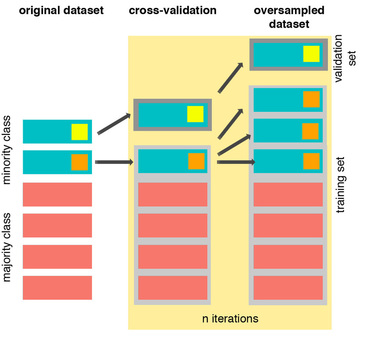

As we see above, SMOTE occurs **"during"** cross-validation and **"not prior"** to the cross-validation process. Synthetic data are created only for the training set without affecting the validation set.


[DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION](https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation)

[Overcoming Class Imbalance using SMOTE Techniques](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/)